In [3]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 773.8 kB/s eta 0:00:00 0:00:01
  Obtaining depen

  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/7a/13/e503968fefabd4c6b2650af21e110aa8466fe21432cd7c43a84577a89438/tensorboard_data_server-0.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 251.3 kB/s eta 0:00:0000:0100:23
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 268.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 463.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 562.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 

## Importing the necessary libraries

In [108]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib import image

## Preparing the training data

In [109]:
train_labels = pd.read_csv("cifar-10/trainLabels.csv", index_col=["id"]).squeeze()
label_encoder = LabelEncoder().fit(train_labels)

classes = label_encoder.classes_

In [110]:
print('Classes in CIFAR10')
print(classes)

print("\nThe number of classes is")
print(len(classes))

print("\nNumber of training data records")
print(train_labels.shape[0])

print("\nThe first 5 labels")
print(train_labels.head(5))

Classes in CIFAR10
['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']

The number of classes is
10

Number of training data records
50000

The first 5 labels
id
1          frog
2         truck
3         truck
4          deer
5    automobile
Name: label, dtype: object


In [111]:
train_data = []
for i in range(1, len(train_labels) + 1):
    img = image.imread('cifar-10/train/' + str(i) + ".png")
    train_data.append([img, label_encoder.transform([train_labels[i]])[0]])
    
len(train_data)

50000

In [112]:
label_encoder.inverse_transform([train_data[0][1]]), train_data[0][0].shape

(array(['frog'], dtype=object), (32, 32, 3))

(-0.5, 31.5, 31.5, -0.5)

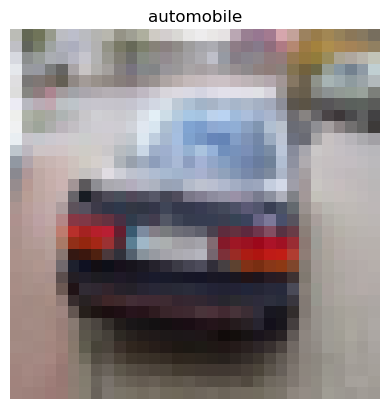

In [113]:
idx = np.random.randint(50000)

plt.imshow(train_data[idx][0])
plt.title(label_encoder.inverse_transform([train_data[idx][1]])[0])
plt.axis(False)

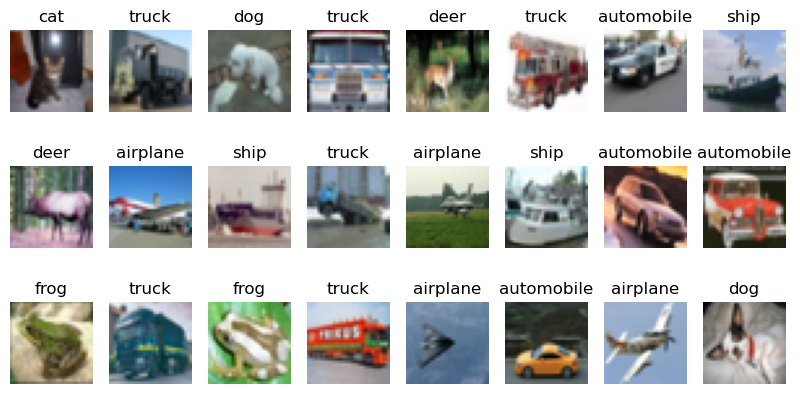

In [114]:
plt.figure(figsize=(10, 5))
 
num_rows = 3
num_cols = 8

for idx in range(num_rows * num_cols):
    idx_to_show = np.random.choice(len(train_labels))
    img    = train_data[idx_to_show][0]
    label  = label_encoder.inverse_transform([train_data[idx_to_show][1]])[0]
        
    ax = plt.subplot(num_rows, num_cols, idx + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")

In [119]:
# Encode labels using LabelEncoder
label_encoder = LabelEncoder().fit(train_labels)
train_labels_encoded = label_encoder.transform(train_labels)

# Create DataFrame
train_df = pd.DataFrame({'image': train_data, 'label': train_labels_encoded})


In [120]:
train_df.head()

,image,label
0,"[[[[0.23137255 0.24313726 0.24705882], [0.1686...",6
1,"[[[[0.6039216 0.69411767 0.73333335], [0.4941...",9
2,"[[[[1. 1. 1.], [0.99215686 0.99215686 0.992156...",9
3,"[[[[0.10980392 0.09803922 0.03921569], [0.1450...",4
4,"[[[[0.6666667 0.7058824 0.7764706], [0.6588235...",1


In [135]:
# Extract images and labels from the 'image' column
images, labels = zip(*train_df['image'])

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)


## Preprocessing and splitting the data into training, validation and testing sets

In [ ]:
# Preprocess data
def preprocess_df_data(image, label):
    image = tf.image.resize(image, (32, 32))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Split data into training, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.map(preprocess_df_data).shuffle(buffer_size=len(train_images)).batch(batch_size=32)

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.map(preprocess_df_data).batch(batch_size=32)

test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.map(preprocess_df_data).batch(batch_size=32)


## Applying data augmentation

In [153]:
from tensorflow.keras.layers.experimental import preprocessing

# Data augmentation
data_augmentation = tf.keras.Sequential([
    preprocessing.Rescaling(1./255),
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
])

augmented_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))


## Creating a basic model

In [154]:
# Build CNN model
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [155]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [156]:
# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
1000/1000 [==============================] - 7s 6ms/step - loss: 2.2841 - accuracy: 0.1182 - val_loss: 2.1320 - val_accuracy: 0.2126
Epoch 2/10
1000/1000 [==============================] - 7s 6ms/step - loss: 2.0709 - accuracy: 0.2467 - val_loss: 2.0296 - val_accuracy: 0.2721
Epoch 3/10
1000/1000 [==============================] - 6s 6ms/step - loss: 1.9985 - accuracy: 0.2745 - val_loss: 1.9676 - val_accuracy: 0.2956
Epoch 4/10
1000/1000 [==============================] - 6s 6ms/step - loss: 1.9418 - accuracy: 0.3013 - val_loss: 1.9182 - val_accuracy: 0.3141
Epoch 5/10
1000/1000 [==============================] - 7s 7ms/step - loss: 1.8933 - accuracy: 0.3193 - val_loss: 1.8798 - val_accuracy: 0.3284
Epoch 6/10
1000/1000 [==============================] - 7s 6ms/step - loss: 1.8571 - accuracy: 0.3334 - val_loss: 1.8463 - val_accuracy: 0.3415
Epoch 7/10
1000/1000 [==============================] - 6s 6ms/step - loss: 1.8323 - accuracy: 0.3419 - val_loss: 1.8377 - val_accuracy:

In [157]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 1.7966 - accuracy: 0.3587
Test accuracy: 0.3587000072002411


## 1. Adding Batch Normalization 

In [158]:
# Build a more complex CNN model with Batch Normalization
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [159]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [160]:
# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
1000/1000 [==============================] - 11s 10ms/step - loss: 1.4567 - accuracy: 0.4854 - val_loss: 44.6526 - val_accuracy: 0.0972
Epoch 2/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.0957 - accuracy: 0.6124 - val_loss: 9.4336 - val_accuracy: 0.1053
Epoch 3/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.9308 - accuracy: 0.6739 - val_loss: 13.5575 - val_accuracy: 0.0967
Epoch 4/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.7948 - accuracy: 0.7215 - val_loss: 17.5087 - val_accuracy: 0.1020
Epoch 5/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.6887 - accuracy: 0.7564 - val_loss: 16.9265 - val_accuracy: 0.0972
Epoch 6/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.5806 - accuracy: 0.7949 - val_loss: 15.0919 - val_accuracy: 0.1214
Epoch 7/10
1000/1000 [==============================] - 11s 10ms/step - loss: 0.4900 - accuracy: 0.8273 - val_loss: 12.

In [161]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 27.7318 - accuracy: 0.1040
Test accuracy: 0.10400000214576721


## 2. Dropout

In [162]:
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Add dropout with a dropout rate of 0.5
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout with a dropout rate of 0.5
    Dense(10, activation='softmax')
])


In [163]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [164]:
# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.8960 - accuracy: 0.3112 - val_loss: 6.0974 - val_accuracy: 0.1032
Epoch 2/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.5475 - accuracy: 0.4430 - val_loss: 14.1378 - val_accuracy: 0.1004
Epoch 3/10
1000/1000 [==============================] - 11s 10ms/step - loss: 1.3964 - accuracy: 0.5055 - val_loss: 1.9878 - val_accuracy: 0.2889
Epoch 4/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.3080 - accuracy: 0.5458 - val_loss: 3.7330 - val_accuracy: 0.1482
Epoch 5/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.2250 - accuracy: 0.5743 - val_loss: 10.6096 - val_accuracy: 0.0994
Epoch 6/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.1420 - accuracy: 0.6074 - val_loss: 9.0082 - val_accuracy: 0.1778
Epoch 7/10
1000/1000 [==============================] - 10s 10ms/step - loss: 1.0857 - accuracy: 0.6211 - val_loss: 20.178

In [165]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 2.8690 - accuracy: 0.2800
Test accuracy: 0.2800000011920929


## 3. Number of Convolution and Pooling Layers

In [167]:
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [168]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [169]:
# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
1000/1000 [==============================] - 20s 20ms/step - loss: 1.9543 - accuracy: 0.2890 - val_loss: 1.7333 - val_accuracy: 0.3716
Epoch 2/10
1000/1000 [==============================] - 20s 20ms/step - loss: 1.5482 - accuracy: 0.4325 - val_loss: 1.6011 - val_accuracy: 0.4219
Epoch 3/10
1000/1000 [==============================] - 20s 20ms/step - loss: 1.3638 - accuracy: 0.5128 - val_loss: 2.5115 - val_accuracy: 0.2049
Epoch 4/10
1000/1000 [==============================] - 19s 19ms/step - loss: 1.2222 - accuracy: 0.5707 - val_loss: 2.3632 - val_accuracy: 0.2313
Epoch 5/10
1000/1000 [==============================] - 20s 20ms/step - loss: 1.0982 - accuracy: 0.6208 - val_loss: 1.7478 - val_accuracy: 0.4891
Epoch 6/10
1000/1000 [==============================] - 20s 20ms/step - loss: 1.0005 - accuracy: 0.6616 - val_loss: 2.4284 - val_accuracy: 0.2580
Epoch 7/10
1000/1000 [==============================] - 20s 19ms/step - loss: 0.9010 - accuracy: 0.6967 - val_loss: 7.9053 -

In [170]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 26.7992 - accuracy: 0.1572
Test accuracy: 0.15719999372959137


## 4. Activation Functions

In [171]:
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='tanh', padding='same'),  # Change activation function to 'tanh'
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='sigmoid', padding='same'),  # Change activation function to 'sigmoid'
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='elu', padding='same'),  # Change activation function to 'elu'
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [172]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [173]:
# Train the model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
1000/1000 [==============================] - 22s 21ms/step - loss: 1.9983 - accuracy: 0.2661 - val_loss: 17.2726 - val_accuracy: 0.0967
Epoch 2/10
1000/1000 [==============================] - 21s 21ms/step - loss: 1.6031 - accuracy: 0.3977 - val_loss: 1.8263 - val_accuracy: 0.3894
Epoch 3/10
1000/1000 [==============================] - 20s 20ms/step - loss: 1.4186 - accuracy: 0.4727 - val_loss: 4.3878 - val_accuracy: 0.2272
Epoch 4/10
1000/1000 [==============================] - 21s 20ms/step - loss: 1.2688 - accuracy: 0.5422 - val_loss: 1.6513 - val_accuracy: 0.4195
Epoch 5/10
1000/1000 [==============================] - 21s 21ms/step - loss: 1.1591 - accuracy: 0.5921 - val_loss: 3.4381 - val_accuracy: 0.1936
Epoch 6/10
1000/1000 [==============================] - 21s 21ms/step - loss: 1.0340 - accuracy: 0.6427 - val_loss: 2.6129 - val_accuracy: 0.1619
Epoch 7/10
1000/1000 [==============================] - 21s 20ms/step - loss: 0.9335 - accuracy: 0.6808 - val_loss: 2.2976 

In [174]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 2s 6ms/step - loss: 4.3251 - accuracy: 0.0979
Test accuracy: 0.09790000319480896
